# Problem Statement
X Education seeks assistance in identifying the most promising leads—those most likely to convert into paying customers. The task is to develop a model that assigns a lead score to each prospect, indicating the likelihood of conversion. Leads with higher scores should have a greater chance of becoming customers, while those with lower scores should be less likely to convert. The CEO has suggested aiming for a target lead conversion rate of approximately 80%.

# Goals of the Case Study
The objective is to create a logistic regression model that assigns a lead score between 0 and 100 to each lead. This scoring system will help the company focus its efforts on potential leads. A higher score signifies a "hot" lead, indicating a high probability of conversion, whereas a lower score indicates a "cold" lead, suggesting a lower probability of conversion.







In [614]:
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries

In [615]:
import numpy as np
import pandas as pd

#visualizers
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix


# stats library
from scipy import stats
import statsmodels.api as sm


pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",150)

# Importing Dataset

In [616]:
Lead_df= pd.read_csv("Leads.csv")

# Inspecting Dataset

In [617]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [618]:
Lead_df.shape

(9240, 37)

In [619]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [620]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [621]:
Lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Step 1: Data Cleaning



Replacing Select in columns with Nan as it means it has no value

In [622]:
Lead_df = Lead_df.replace('Select',np.nan)
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [623]:
#dropping the unique value columns since it wont affect our analysis
Lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [624]:
Lead_df = Lead_df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Magazine','Update me on Supply Chain Content'], axis = 1)

**Checking % of missing values**

In [625]:
round(100*(Lead_df.isnull().sum()/len(Lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

**Dropping columns with missing values >30%**

In [626]:
cols=Lead_df.columns

for i in cols:
    if((100*(Lead_df[i].isnull().sum()/len(Lead_df.index))) >= 30):
        Lead_df.drop(columns=[i], inplace = True)

In [627]:
#Checking remaining null columns
remaining_null_per=100*(Lead_df.isnull().sum()/Lead_df.shape[0])
remaining_null_per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

**Checking remaining columns with NULL values less than 15%**

In [628]:
remaining_null_per[(remaining_null_per<13) & (remaining_null_per>0)]

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

In [629]:
#As we can see these columns have Null values below 5% we can impute these columns with their respective mode values

In [630]:
print(Lead_df['Lead Source'].value_counts())

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64



**Google is having highest number of occurences, hence we will impute the missing values with label 'Google'**

In [631]:
# Replacing NaN values in 'Lead Source' column with 'Google'
Lead_df['Lead Source'] = Lead_df['Lead Source'].fillna('Google')

# Standardizing the 'Lead Source' entries by converting 'google' to 'Google'
Lead_df['Lead Source'] = Lead_df['Lead Source'].str.replace('google', 'Google', case=False)

In [632]:
#checking value counts of Country column

print(Lead_df['Country'].value_counts())

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

**Most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column**

In [633]:
Lead_df.drop('Country',axis=1,inplace=True)


Checking value counts of 'What is your current occupation' column

In [634]:
print(Lead_df['What is your current occupation'].value_counts())

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


In [635]:
#Creating new category 'Not Available'

Lead_df['What is your current occupation'] = Lead_df['What is your current occupation'].replace(np.nan, 'Not Available')

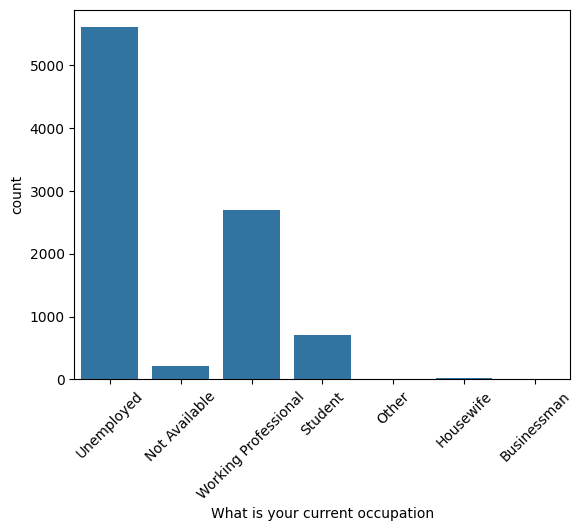

In [636]:
P1=sns.countplot(x='What is your current occupation',  data = Lead_df )
P1.set_xticklabels(Lead_df['What is your current occupation'].value_counts().index.to_list(),rotation=45)
plt.show()

Maximum leads generated are unemployed

**Checking value counts of Country column**


In [637]:
print(Lead_df['What matters most to you in choosing a course'].value_counts())

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


This column spread of variance is very low , hence it can be dropped.

In [638]:
Lead_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

**Checking value counts of Last Activity column**

In [639]:
print(Lead_df['Last Activity'].value_counts())

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64


**Imputing missing value with mode"Email Opened"**

In [640]:
Lead_df['Last Activity'] = Lead_df['Last Activity'].replace(np.nan,'Email Opened')

In [641]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,Modified


In [642]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9240 non-null   obje

# EDA

## Univariate analysis

In [643]:
Lead_df['Lead Source'].value_counts() #Looks for unique value occurs

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Text(0, 0.5, 'count')

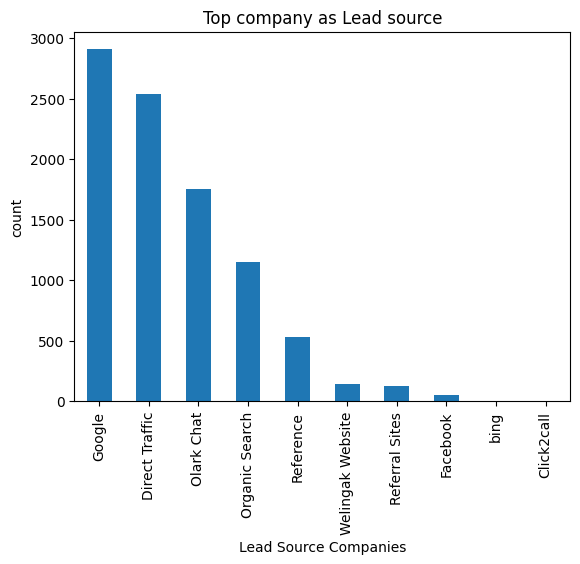

In [644]:
ax=Lead_df['Lead Source'].value_counts() \
.head(10) \
.plot(kind='bar',title='Top company as Lead source')
ax.set_xlabel('Lead Source Companies')
ax.set_ylabel('count')

In [645]:
Lead_df['Total Time Spent on Website'].unique()

array([   0,  674, 1532, ...,  603,  483,  927])

In [646]:
Lead_df['Total Time Spent on Website'] = Lead_df['Total Time Spent on Website'].replace('Unemployed',0)
Lead_df['Total Time Spent on Website'] = Lead_df['Total Time Spent on Website'].astype(float)

Text(0.5, 0, 'Total_time_spent')

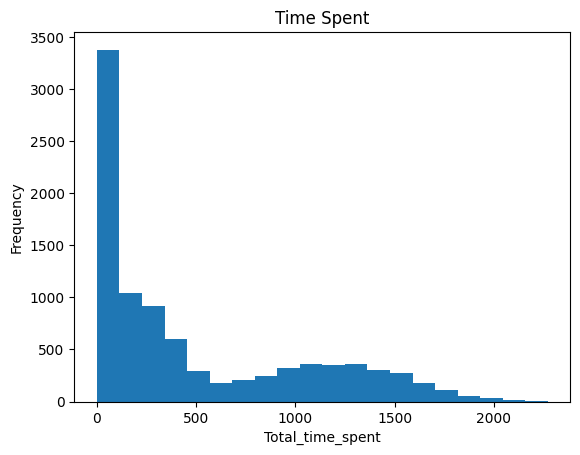

In [647]:
ax=Lead_df['Total Time Spent on Website'].plot(kind='hist',bins=20,title='Time Spent')
ax.set_xlabel('Total_time_spent')

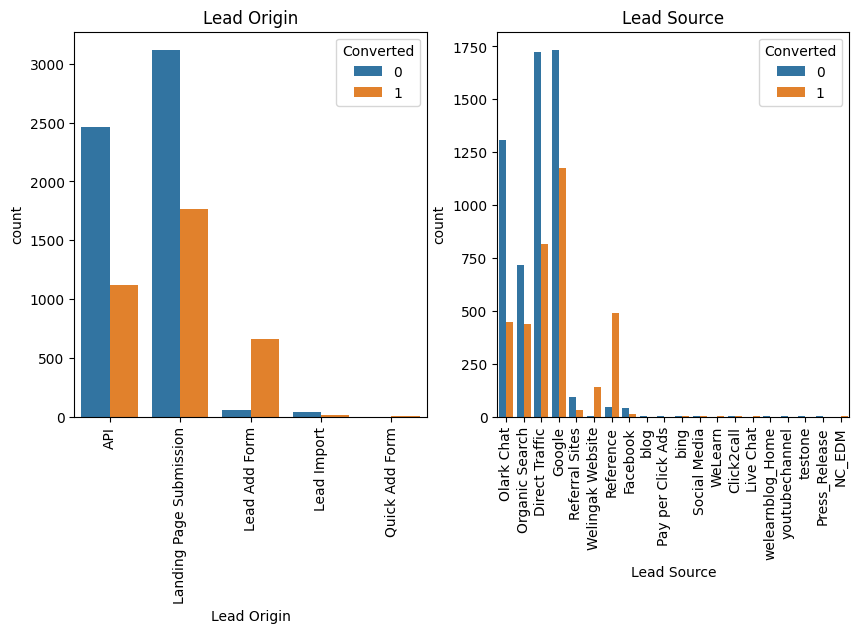

In [648]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [649]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9240 non-null   float64
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9240 non-null   obje

## Data Transformation

Now converting the columns having 'Yes / No' to '1 / 0'.

Changing the categorical columns to numerical columns with the help of above conversion

In [650]:
cat_col = ['Do Not Email', 'Do Not Call','Search', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','A free copy of Mastering The Interview']
for col in cat_col:
    Lead_df[col] = Lead_df[col].map({'Yes':1,'No':0})

In [651]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Student,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,0,Modified


In [652]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Do Not Call                             9240 non-null   int64  
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9240 non-null   float64
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9240 non-null   obje

After converting the binary categories from 'Yes' to 1 & 'No' to 0, we will now create dummy variables.

In [653]:
dummy_var = pd.get_dummies(Lead_df[['Lead Origin','Lead Source','Last Activity'
                                   ,'What is your current occupation',
                                   'Last Notable Activity']], drop_first = True, dtype = 'int32')
dummy_var.head()



,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [654]:
Lead_df = pd.concat([Lead_df,dummy_var], axis=1)

In [655]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Number                                           9240 non-null   int64  
 2   Lead Origin                                           9240 non-null   object 
 3   Lead Source                                           9240 non-null   object 
 4   Do Not Email                                          9240 non-null   int64  
 5   Do Not Call                                           9240 non-null   int64  
 6   Converted                                             9240 non-null   int64  
 7   TotalVisits                                           9103 non-null   float64
 8   Total Time Spent on Website                           9240

In [656]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Student,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [657]:
Lead_df.shape

(9240, 81)

Now removing the Duplicate columns

In [658]:
# We have created a dummies for the below categories hence removing the original column.

duplicates = ['Lead Origin','Lead Source','Last Activity' ,'What is your current occupation',
       'Last Notable Activity']

Lead_df = Lead_df.drop(duplicates, axis=1)
Lead_df.shape

(9240, 76)

In [659]:
# Removing redundant columns from the dataset

redundant_col = ['Receive More Updates About Our Courses']

Lead_df = Lead_df.drop(redundant_col, axis=1)

In [660]:
Lead_df['Page Views Per Visit'] = Lead_df['Page Views Per Visit'].replace('Better Career Prospects',0)


In [661]:
# Converting some categorical variables to numerical variables

Lead_df['TotalVisits'] = Lead_df['TotalVisits'].astype('float64')
Lead_df['Page Views Per Visit'] = Lead_df['Page Views Per Visit'].astype('float64')
#Lead_df['Converted'] = Lead_df['Converted'].astype('int32')


In [662]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Number                                           9240 non-null   int64  
 2   Do Not Email                                          9240 non-null   int64  
 3   Do Not Call                                           9240 non-null   int64  
 4   Converted                                             9240 non-null   int64  
 5   TotalVisits                                           9103 non-null   float64
 6   Total Time Spent on Website                           9240 non-null   float64
 7   Page Views Per Visit                                  9103 non-null   float64
 8   Search                                                9240

 we have changed all the datatypes to numeric types

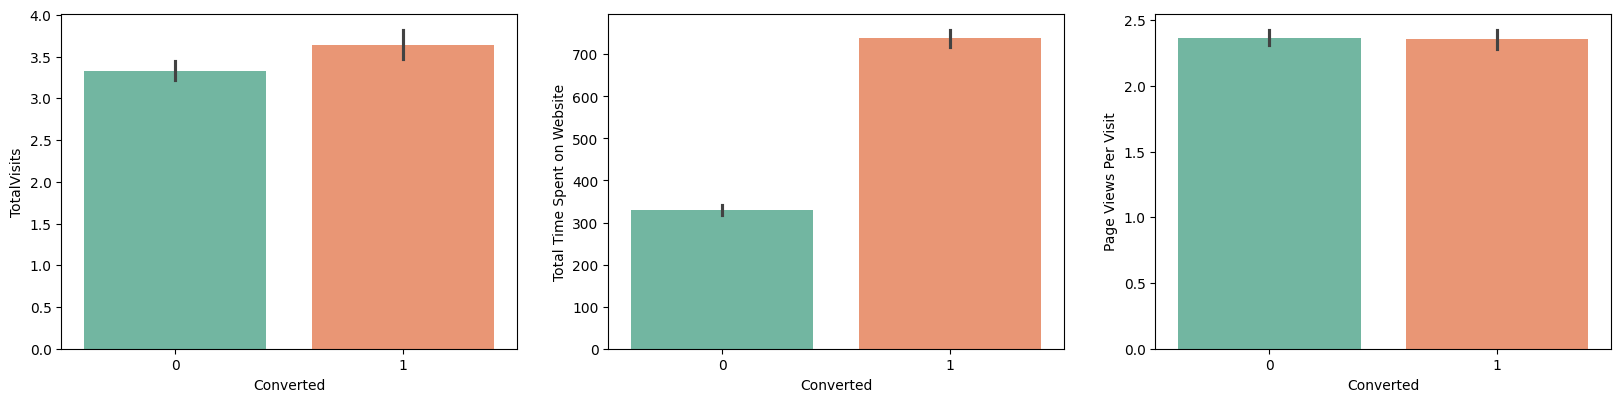

In [663]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = Lead_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = Lead_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = Lead_df)
plt.show()

**Inference:**
The conversion rate is high for Total Visits and Total Time Spent on Website.

CHECKING FOR OUTLIERS

In [664]:
round(Lead_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95,0.99]),2)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9103.00,9240.00,9103.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.08,0.00,0.39,3.45,487.70,2.36,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.53,0.08,0.01,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.29,0.00,0.02,0.61,0.08,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,23406.00,0.27,0.01,0.49,4.85,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03,0.46,0.50,0.27,0.08,0.01,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.12,0.03,0.01,0.01,0.01,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.45,0.04,0.15,0.49,0.27,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,579533.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,589543.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

We can say that 'TotalVisits' & 'Page Views Per Visit' have outliers in them and we need to treat them to make our dataset fit for the analysis.

Total Visits

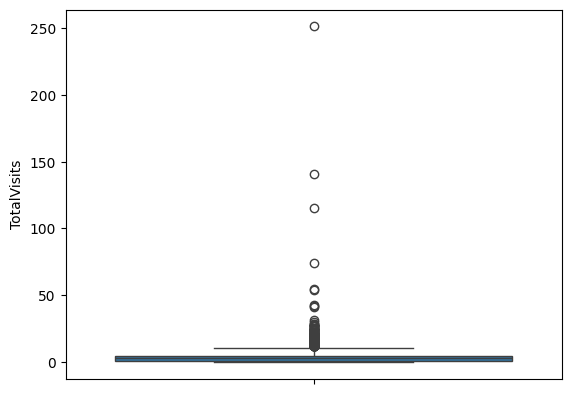

In [665]:
#visualizing spread of variable Total Visits

sns.boxplot(y=Lead_df['TotalVisits'])
plt.show()

 Outliers are clearly visible

In [666]:
#checking percentile values for "Total Visits"

Lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

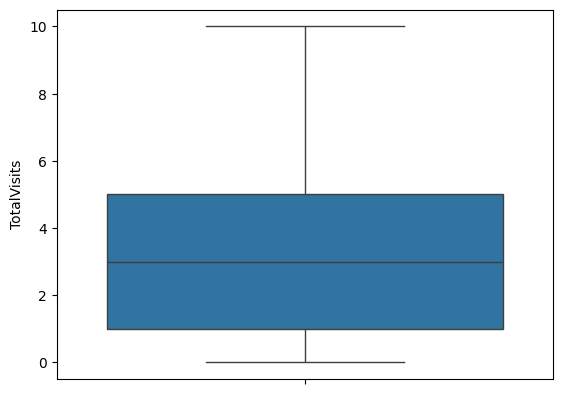

In [667]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = Lead_df['TotalVisits'].quantile([0.05,0.95]).values
Lead_df['TotalVisits'][Lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
Lead_df['TotalVisits'][Lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=Lead_df['TotalVisits'])
plt.show()

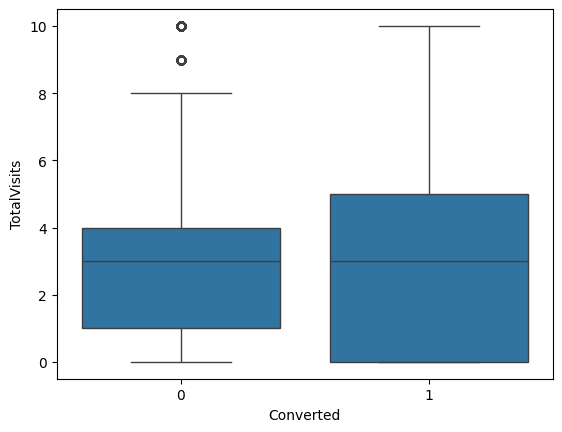

In [668]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_df)
plt.show()

**Inference:**
Since the median is the same for both converted and non-converted leads, no definitive conclusions can be drawn from the variable TotalVisits.

Page views per visit

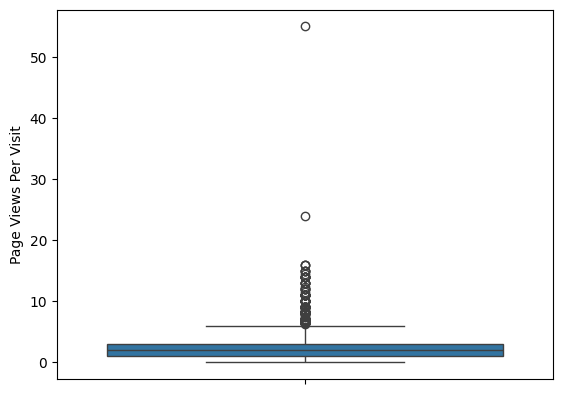

In [669]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =Lead_df['Page Views Per Visit'])
plt.show()

**Outliers are clearly visible in the boxplot above, indicating that outlier treatment is necessary for this variable.**

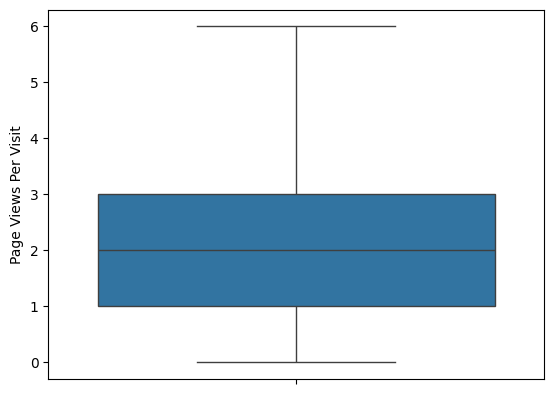

In [670]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = Lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
Lead_df['Page Views Per Visit'][Lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Lead_df['Page Views Per Visit'][Lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=Lead_df['Page Views Per Visit'])
plt.show()

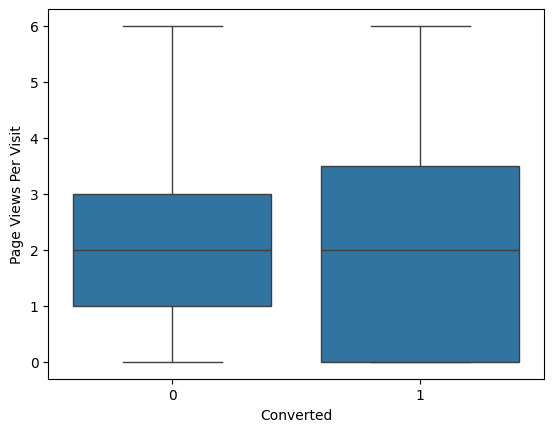

In [671]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Lead_df)
plt.show()


**Inference:**
The median for both converted and non-converted leads is nearly identical. Therefore, no definitive conclusions can be drawn based on Page Views Per Visit.

**The outliers have been removed from the dataset, now our data is clean and free from outliers.**

In [672]:
Lead_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532.0,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305.0,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [673]:
Lead_df.isnull().sum(axis=0)>0

Prospect ID                                           False
Lead Number                                           False
Do Not Email                                          False
Do Not Call                                           False
Converted                                             False
                                                      ...  
Last Notable Activity_Resubscribed to emails          False
Last Notable Activity_SMS Sent                        False
Last Notable Activity_Unreachable                     False
Last Notable Activity_Unsubscribed                    False
Last Notable Activity_View in browser link Clicked    False
Length: 75, dtype: bool

In [674]:
Lead_df['TotalVisits'].unique()

array([ 0.,  5.,  2.,  1.,  4.,  8., 10.,  6.,  3.,  7., nan,  9.])

In [675]:
Lead_df['TotalVisits'] = Lead_df['TotalVisits'].fillna(Lead_df['TotalVisits'].mean())
Lead_df['Page Views Per Visit'] = Lead_df['Page Views Per Visit'].fillna(Lead_df['Page Views Per Visit'].mean())

In [676]:
Lead_df.isnull().sum()

Prospect ID                                           0
Lead Number                                           0
Do Not Email                                          0
Do Not Call                                           0
Converted                                             0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 75, dtype: int64

In [677]:
#dropping the null value rows
Lead_df.dropna(inplace=True)

In [678]:
Lead_df.drop(['Lead Number', 'Prospect ID'], axis = 1, inplace = True)
Lead_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532.0,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305.0,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [679]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Do Not Call                                           9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   float64
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Search                                                9240 non-null   int64  
 7   Newspaper Article                                     9240 non-null   int64  
 8   X Education Forums                                    9240

# Building the model


In [680]:
X = Lead_df.drop('Converted',axis=1)
y = Lead_df['Converted']

In [681]:
#splitting the dataset into 70% train set and 30% test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [682]:
print(x_train.shape)
print(x_test.shape)

(6468, 72)
(2772, 72)


In [683]:
print(y_train.shape)
print(y_test.shape)

(6468,)
(2772,)


In [684]:
x_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000155,3.210872,486.976036,2.262711,0.001855,0.000155,0.000155,0.000155,0.000309,0.001082,0.315708,0.529839,0.073129,0.005875,0.000155,0.277829,0.005875,0.317100,0.000309,0.000155,0.193414,0.121985,0.000155,0.0,0.056432,0.013142,0.000309,0.000155,0.012059,0.000618,0.000155,0.0,0.0,0.000155,0.045609,0.034477,0.027211,0.000309,0.385127,0.000155,0.012369,0.003711,0.108071,0.070037,0.0,0.294682,0.010359,0.005566,0.000773,0.000155,0.001082,0.290198,0.001391,0.021490,0.609462,0.075448,0.006957,0.017780,0.000309,0.309524,0.000155,0.0,0.001855,0.367502,0.019171,0.036951,0.0,0.231602,0.003865,0.004020,0.000155
std,0.268799,0.012434,2.776853,548.732639,1.772402,0.043036,0.012434,0.012434,0.012434,0.017583,0.032882,0.464833,0.499147,0.260369,0.076429,0.012434,0.447963,0.076429,0.465383,0.017583,0.012434,0.395005,0.327294,0.012434,0.0,0.230771,0.113890,0.017583,0.012434,0.109159,0.024862,0.012434,0.0,0.0,0.012434,0.208652,0.182466,0.162710,0.017583,0.486663,

In [685]:
#scaling the numeric features
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4715,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7132,0,0,0.2,0.549296,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8954,0,0,0.4,0.170335,0.221667,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5283,1,0,1.0,0.532130,1.000000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3003,0,0,0.3,0.595951,0.500000,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [686]:
x_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000155,0.321087,0.214338,0.377118,0.001855,0.000155,0.000155,0.000155,0.000309,0.001082,0.315708,0.529839,0.073129,0.005875,0.000155,0.277829,0.005875,0.317100,0.000309,0.000155,0.193414,0.121985,0.000155,0.0,0.056432,0.013142,0.000309,0.000155,0.012059,0.000618,0.000155,0.0,0.0,0.000155,0.045609,0.034477,0.027211,0.000309,0.385127,0.000155,0.012369,0.003711,0.108071,0.070037,0.0,0.294682,0.010359,0.005566,0.000773,0.000155,0.001082,0.290198,0.001391,0.021490,0.609462,0.075448,0.006957,0.017780,0.000309,0.309524,0.000155,0.0,0.001855,0.367502,0.019171,0.036951,0.0,0.231602,0.003865,0.004020,0.000155
std,0.268799,0.012434,0.277685,0.241520,0.295400,0.043036,0.012434,0.012434,0.012434,0.017583,0.032882,0.464833,0.499147,0.260369,0.076429,0.012434,0.447963,0.076429,0.465383,0.017583,0.012434,0.395005,0.327294,0.012434,0.0,0.230771,0.113890,0.017583,0.012434,0.109159,0.024862,0.012434,0.0,0.0,0.012434,0.208652,0.182466,0.162710,0.017583,0.486663,0.01

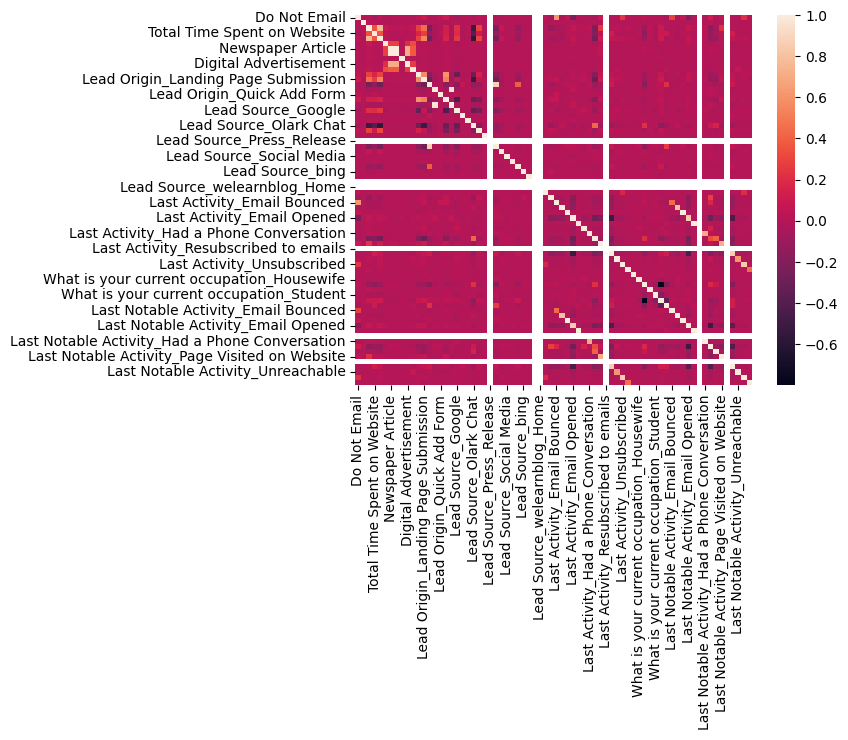

In [687]:
sns.heatmap(x_train.corr())
plt.show()

In [688]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(x_train, 10))

Top Absolute Correlations
Last Activity_Email Received                   Last Notable Activity_Email Received          1.000000
Last Activity_Email Marked Spam                Last Notable Activity_Email Marked Spam       1.000000
Newspaper Article                              X Education Forums                            1.000000
Lead Origin_Lead Import                        Lead Source_Facebook                          0.973529
Lead Origin_Lead Add Form                      Lead Source_Reference                         0.870640
Last Activity_SMS Sent                         Last Notable Activity_SMS Sent                0.849364
Last Activity_Unsubscribed                     Last Notable Activity_Unsubscribed            0.849177
Last Activity_Email Opened                     Last Notable Activity_Email Opened            0.845987
Last Activity_Email Link Clicked               Last Notable Activity_Email Link Clicked      0.804447
What is your current occupation_Not Available  What is y

In [689]:
#dropping highly correlated dummy variables
x_train.drop(['Last Activity_Email Marked Spam','Last Notable Activity_Email Marked Spam','Last Activity_Email Received','Last Notable Activity_Email Received','Newspaper Article','X Education Forums'], inplace = True, axis=1)
x_test.drop(['Last Activity_Email Marked Spam','Last Notable Activity_Email Marked Spam','Last Activity_Email Received','Last Notable Activity_Email Received','Newspaper Article','X Education Forums'], inplace = True, axis=1)

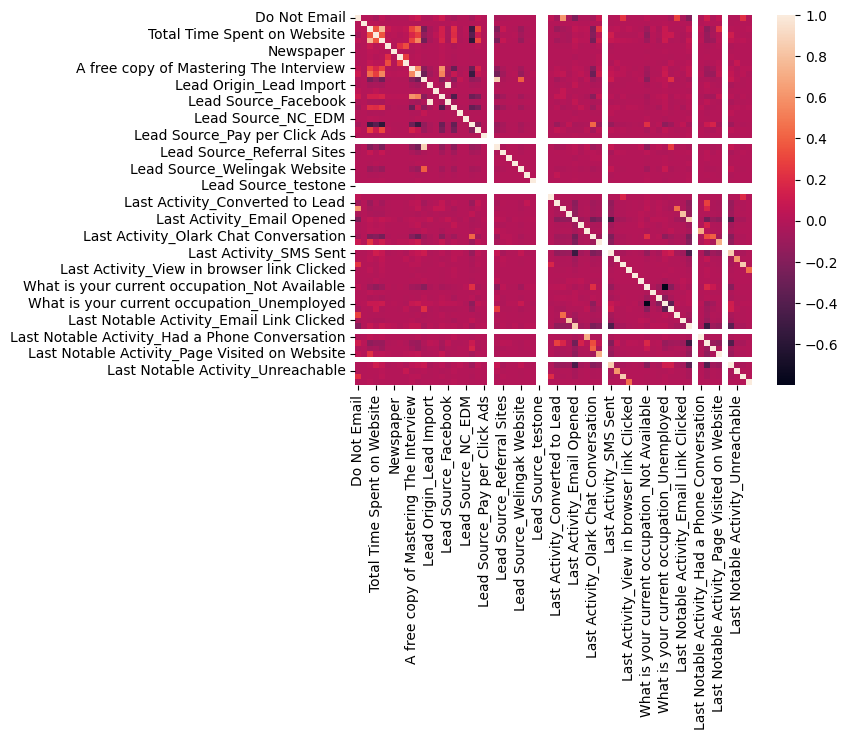

In [690]:
sns.heatmap(x_train.corr())
plt.show()

Building the model


In [691]:
Lead_df.isnull().sum()

Do Not Email                                          0
Do Not Call                                           0
Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 73, dtype: int64

In [692]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 4715 to 7270
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   Do Not Call                                           6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   Search                                                6468 non-null   int64  
 6   Newspaper                                             6468 non-null   int64  
 7   Digital Advertisement                                 6468 non-null   int64  
 8   Through Recommendations                               6468 n

In [693]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6468 entries, 4715 to 7270
Series name: Converted
Non-Null Count  Dtype
--------------  -----
6468 non-null   int64
dtypes: int64(1)
memory usage: 101.1 KB


In [694]:
y_train.astype(int)

4715    0
7132    1
8954    0
5283    0
3003    0
       ..
5734    0
5191    0
5390    1
860     0
7270    1
Name: Converted, Length: 6468, dtype: int64

In [695]:
logreg = LogisticRegression()

In [696]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)

In [697]:
rfe.support_

array([ True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False])

In [698]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 38),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 29),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 21),
 ('Through Recommendations', False, 28),
 ('A free copy of Mastering The Interview', False, 36),
 ('Lead Origin_Landing Page Submission', False, 44),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Origin_Quick Add Form', False, 23),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 25),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 39),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Social M

In [699]:
col = x_train.columns[rfe.support_]

In [700]:
x_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conver

Assessing the model with statsModel

In [701]:
logm1=  sm.GLM(y_train.astype(int), (sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.7
Date:                Sun, 16 Jun 2024   Deviance:                       5391.4
Time:                        18:57:34   Pearson chi2:                 6.50e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2460      0.090      2.738      0.006       0.070       0.422
Do Not Email                                            -1.7263      0.163    -10.597      0.000      -2.046      -1.407
Total Time Spent on Website                              4.1776      0.155     26.932      0.000       3.874       4.482
Page Views Per Visit                                    -1.0582      0.134     -7.882      0.000      -1.321      -0.795
Lead Origin_Lead Add Form                                2.8034      0.197     14.220      0.000       2.417       3.190
Lead Source_Welingak Website                            22.6211   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
Last Activity_Converted to Lead                         -1.0748      0.208     -5.166      0.000      -1.483      -0.667
What is your current occupation_Housewife               24.3464   4.63e+04      0.001      1.000   -9.07e+04    9.08e+04
What is your current occupation_Not Available           -1.1048      0.087    -12.759      0.000      -1.275      -0.935
What is your current occupation_Working Professional     2.3020      0.179     12.840      0.000       1.951       2.653
Last Notable Activity_Email Link Clicked                -1.6951      0.263     -6.454      0.000      -2.210      -1.180
Last Notable Activity_Email Opened                      -1.4566      0.089    -16.424      0.000      -1.630      -1.283
Last Notable Activity_Had a Phone Conversation           2.0196      1.087      1.858      0.063      -0.111       4.150
Last Notable Activity_Modified                          -1.8203      0.094    -19.390      0.000      -2.004      -1.636
Last Notable Activity_Olark Chat Conversation           -2.5573      0.339     -7.537      0.000      -3.222      -1.892
Last Notable Activity_Page Visited on Website           -1.6575      0.191     -8.668      0.000      -2.032      -1.283
========================================================================================================================
"""

In [702]:
col = col.drop('What is your current occupation_Housewife')

In [703]:
logm2=  sm.GLM(y_train.astype(int), (sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.7
Date:                Sun, 16 Jun 2024   Deviance:                       5399.5
Time:                        18:57:34   Pearson chi2:                 6.52e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2454      0.090      2.732      0.006       0.069       0.421
Do Not Email                                            -1.7299      0.163    -10.616      0.000      -2.049      -1.410
Total Time Spent on Website                              4.1849      0.155     26.985      0.000       3.881       4.489
Page Views Per Visit                                    -1.0581      0.134     -7.884      0.000      -1.321      -0.795
Lead Origin_Lead Add Form                                2.8157      0.197     14.298      0.000       2.430       3.202
Lead Source_Welingak Website                            22.6064   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
Last Activity_Converted to Lead                         -1.0817      0.208     -5.199      0.000      -1.490      -0.674
What is your current occupation_Not Available           -1.1093      0.087    -12.813      0.000      -1.279      -0.940
What is your current occupation_Working Professional     2.2976      0.179     12.813      0.000       1.946       2.649
Last Notable Activity_Email Link Clicked                -1.6823      0.261     -6.448      0.000      -2.194      -1.171
Last Notable Activity_Email Opened                      -1.4540      0.089    -16.397      0.000      -1.628      -1.280
Last Notable Activity_Had a Phone Conversation           2.0201      1.087      1.858      0.063      -0.111       4.151
Last Notable Activity_Modified                          -1.8139      0.094    -19.339      0.000      -1.998      -1.630
Last Notable Activity_Olark Chat Conversation           -2.5573      0.339     -7.533      0.000      -3.223      -1.892
Last Notable Activity_Page Visited on Website           -1.6582      0.191     -8.668      0.000      -2.033      -1.283
========================================================================================================================
"""

In [704]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.61
1,Total Time Spent on Website,1.99
11,Last Notable Activity_Modified,1.89
9,Last Notable Activity_Email Opened,1.60
6,What is your current occupation_Not Available,1.50
3,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak Website,1.22
7,What is your current occupation_Working Professional,1.18
5,Last Activity_Converted to Lead,1.16
0,Do Not Email,1.12


VIF values seems to be fine but dropping 'Lead Source_Welingak Website	' as it has high p-value

In [705]:
col = col.drop(['Lead Source_Welingak Website','Last Notable Activity_Had a Phone Conversation'])

In [706]:
logm3=  sm.GLM(y_train.astype(int), (sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.1
Date:                Sun, 16 Jun 2024   Deviance:                       5424.3
Time:                        18:57:34   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2594      0.090      2.891      0.004       0.084       0.435
Do Not Email                                            -1.7318      0.162    -10.691      0.000      -2.049      -1.414
Total Time Spent on Website                              4.1759      0.155     26.951      0.000       3.872       4.480
Page Views Per Visit                                    -1.0535      0.134     -7.860      0.000      -1.316      -0.791
Lead Origin_Lead Add Form                                3.1122      0.194     16.078      0.000       2.733       3.492
Last Activity_Converted to Lead                         -1.0801      0.208     -5.196      0.000      -1.488      -0.673
What is your current occupation_Not Available           -1.1105      0.087    -12.833      0.000      -1.280      -0.941
What is your current occupation_Working Professional     2.2793      0.180     12.682      0.000       1.927       2.632
Last Notable Activity_Email Link Clicked                -1.6937      0.260     -6.505      0.000      -2.204      -1.183
Last Notable Activity_Email Opened                      -1.4675      0.088    -16.587      0.000      -1.641      -1.294
Last Notable Activity_Modified                          -1.8258      0.094    -19.517      0.000      -2.009      -1.642
Last Notable Activity_Olark Chat Conversation           -2.5700      0.340     -7.569      0.000      -3.235      -1.904
Last Notable Activity_Page Visited on Website           -1.6673      0.191     -8.738      0.000      -2.041      -1.293
========================================================================================================================
"""

In [707]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.60
1,Total Time Spent on Website,1.99
9,Last Notable Activity_Modified,1.89
8,Last Notable Activity_Email Opened,1.60
5,What is your current occupation_Not Available,1.50
4,Last Activity_Converted to Lead,1.16
6,What is your current occupation_Working Professional,1.16
3,Lead Origin_Lead Add Form,1.15
0,Do Not Email,1.12
11,Last Notable Activity_Page Visited on Website,1.08


p-values and VIF values seems to be fine. Now, we will proceed to make predictions


In [708]:
# Getting the predicted values on the train set
y_train_pred = logm3.fit().predict(sm.add_constant(x_train[col]))
y_train_pred[:10]

4715    0.089594
7132    0.713023
8954    0.676374
5283    0.122268
3003    0.328498
478     0.064352
1352    0.701200
3166    0.927729
7700    0.218797
2647    0.172731
dtype: float64

In [709]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08959406, 0.71302335, 0.67637383, 0.122268  , 0.32849807,
       0.06435175, 0.70119985, 0.92772895, 0.21879741, 0.17273056])

In [710]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.089594
1,1,0.713023
2,0,0.676374
3,0,0.122268
4,0,0.328498


In [711]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.089594,0
1,1,0.713023,1
2,0,0.676374,1
3,0,0.122268,0
4,0,0.328498,0


In [712]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3453  531]
 [ 732 1752]]


In [713]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [714]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7053140096618358

In [715]:
# Let us calculate specificity
TN / float(TN+FP)

0.8667168674698795

In [716]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8047309833024119

**With the cut off of 0.5, we have got 80.4% accuracy, 86.6% specificity and 70.53% sensitivity.**

# OPTIMISING CUT OFF

In [717]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [718]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

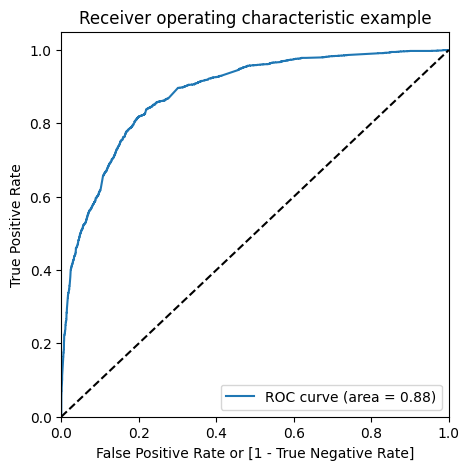

In [719]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

ROC AUC score is 0.88 which represents that model can produce relative scores to descriminate between positives and negative instances across all classification thresholds

In [720]:
#creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.089594,0,1,0,0,0,0,0,0,0,0,0
1,1,0.713023,1,1,1,1,1,1,1,1,1,0,0
2,0,0.676374,1,1,1,1,1,1,1,1,0,0,0
3,0,0.122268,0,1,1,0,0,0,0,0,0,0,0
4,0,0.328498,0,1,1,1,1,0,0,0,0,0,0


In [721]:
#creating a dataset to see accuracy, sensitivity and specificty across all cutoffs
cutoff_df = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Specificity','Sensitivity'])
for i in [float(x)/10 for x in range(10)]:
  cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
  total1=sum(sum(cm1))
  Accuracy = (cm1[0,0]+cm1[1,1])/total1
  Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] =[ i ,Accuracy, Specificity,Sensitivity]
cutoff_df

,Probability,Accuracy,Specificity,Sensitivity
0.0,0.0,0.384045,0.000000,1.000000
0.1,0.1,0.620748,0.399849,0.975040
0.2,0.2,0.749536,0.649598,0.909823
0.3,0.3,0.800247,0.783886,0.826490
0.4,0.4,0.810297,0.829819,0.778986
0.5,0.5,0.804731,0.866717,0.705314
0.6,0.6,0.788033,0.913153,0.587359
0.7,0.7,0.778293,0.949046,0.504428
0.8,0.8,0.758658,0.970884,0.418277
0.9,0.9,0.706555,0.988454,0.254428


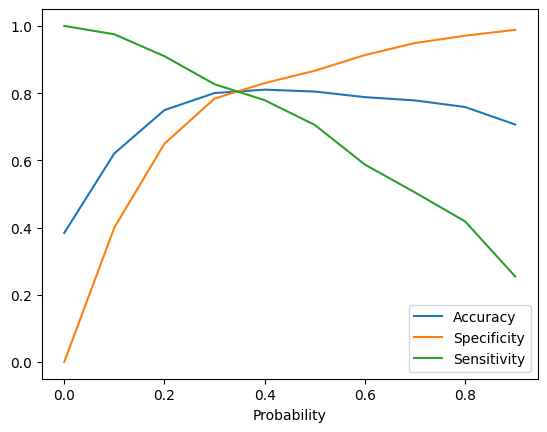

In [722]:
cutoff_df.plot.line(x='Probability', y=['Accuracy', 'Specificity','Sensitivity'])
plt.show()

From this graph we can deduce that the optimal cutoff would be around 0.35


# Predictions on Test set

In [723]:
x_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4608,0,0,8.0,252.0,2.67,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7935,1,0,2.0,929.0,2.00,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4043,1,0,1.0,2.0,1.00,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7821,0,0,2.0,323.0,2.00,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
856,0,0,3.0,201.0,3.00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [724]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4608 to 1160
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   Do Not Call                                           2772 non-null   int64  
 2   TotalVisits                                           2772 non-null   float64
 3   Total Time Spent on Website                           2772 non-null   float64
 4   Page Views Per Visit                                  2772 non-null   float64
 5   Search                                                2772 non-null   int64  
 6   Newspaper                                             2772 non-null   int64  
 7   Digital Advertisement                                 2772 non-null   int64  
 8   Through Recommendations                               2772 n

In [725]:
x_test.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.00000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0
mean,0.081890,0.000361,3.114359,489.383478,2.250156,0.000722,0.0,0.000722,0.0,0.305195,0.526335,0.088384,0.006133,0.0,0.269120,0.006133,0.309524,0.0,0.0,0.181818,0.131674,0.0,0.000722,0.060967,0.014430,0.0,0.0,0.023088,0.000722,0.0,0.000361,0.000361,0.0,0.047980,0.037157,0.032828,0.378427,0.012987,0.002165,0.098846,0.067460,0.000361,0.302670,0.00938,0.009019,0.000361,0.0,0.001082,0.293290,0.002525,0.025613,0.598124,0.078644,0.005411,0.020924,0.297619,0.000361,0.000722,0.371573,0.021284,0.028499,0.000361,0.243146,0.002525,0.007576,0.0
std,0.274247,0.018993,2.723397,546.453583,1.795238,0.026856,0.0,0.026856,0.0,0.460573,0.499396,0.283904,0.078085,0.0,0.443582,0.078085,0.462381,0.0,0.0,0.385764,0.338197,0.0,0.026856,0.239313,0.119277,0.0,0.0,0.150210,0.026856,0.0,0.018993,0.018993,0.0,0.213762,0.189181,0.178219,0.485082,0.113239,0.046482,0.298508,0.250863,0.018993,0.459496,0.09641,0.094555,0.018993,0.0,0.032886,0.455352,0.050197,0.158007,0.490366,0.269230,0.073375,0.143154,0.457294,0.018993,0.026856,0.483312,0.144356,0.166424,0.018993,0.429060,0.050197,0.086724,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0

In [726]:
#scaling the numeric features
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
if not hasattr(scaler, 'data_min_'):
    print("Scaler is not fitted yet.")
else:
    print("Scaler is fitted.")


Scaler is fitted.


In [727]:
print(x_test.shape)
print(x_train.shape)

(2772, 66)
(6468, 66)


In [728]:
x_test = x_test[col]
y_test_pred = logm3.fit().predict(sm.add_constant(x_test))

In [729]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.22903526, 0.0451145 , 0.03017363, 0.78813159, 0.07756314,
       0.1346065 , 0.95331094, 0.19140932, 0.48808198, 0.97864932])

In [730]:
# Data frame with given convertion rate and probablity of predicted ones
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,1,0.229035
1,0,0.045114
2,0,0.030174
3,0,0.788132
4,0,0.077563


In [731]:
# Substituting 0 or 1 with the cut off as 0.35(calculated)
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.089594,0,1,0,0,0,0,0,0,0,0,0
1,1,0.713023,1,1,1,1,1,1,1,1,1,0,0
2,0,0.676374,1,1,1,1,1,1,1,1,0,0,0
3,0,0.122268,0,1,1,0,0,0,0,0,0,0,0
4,0,0.328498,0,1,1,1,1,0,0,0,0,0,0


In [732]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.229035,0
1,0,0.045114,0
2,0,0.030174,0
3,0,0.788132,1
4,0,0.077563,0


In [733]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.814935064935065

In [734]:
#lets create confusion matric to calculate specificity and sensitivity
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print(confusion)

[[1358  337]
 [ 176  901]]


In [735]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [736]:
Specificity = TN / (TN + FP)
Specificity

0.8011799410029499

In [737]:
Sensitivity = TP / (TP + FN)
Sensitivity

0.8365831012070566

# Precision and recall

**On train set**

In [738]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3234,  750],
       [ 493, 1991]])

In [739]:
#precision
precision = confusion[1,1] / float(confusion[1,1]+confusion[0,1])
precision


0.7263772345859175

In [740]:
#Recall
recall = confusion[1,1] / float(confusion[1,1]+confusion[1,0])
recall


0.8015297906602254

0.35 as cutoff, we have got 72.63% precision and 80.01% recall

**On Test set**

In [748]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion

array([[1358,  337],
       [ 176,  901]])

In [749]:
#precision
precision = confusion[1,1] / float(confusion[1,1]+confusion[0,1])
precision

0.7277867528271406

In [750]:
#Recall
recall = confusion[1,1] / float(confusion[1,1]+confusion[1,0])
recall

0.8365831012070566

0.35 as cutoff, we have got 72.77% precision and 83.65% recall on test set
